<div style="text-align: center;">

# **Text Classification for Spam**

</div>

<div align="center">
 <img src="https://storage.googleapis.com/gweb-cloudblog-publish/images/image4_v2LFcq0.max-1200x1200.png" alt="drawing" width="1000"/>
</div>


# **1. Business Objective**

## **Identify the business task and translate it into an NLP Task**

This project aims to develop a robust system for identifying spam emails, translating the business need into an NLP task. The goal is to differentiate between legitimate messages and spam messages, thereby reducing time wasted on malicious emails.

## **Consider key stakeholders**

- **IT Department**: Responsible for maintaining and improving email filtering systems.
- **Employees**: Will benefit from a cleaner inbox and reduced time spent dealing with spam.
- **Company Management**: Interested in improving overall productivity and reducing security risks associated with spam emails (e.g., phishing scams).

## **Overall objectives**

- **Obtain the dataset**: Gather a suitable dataset of email messages labeled as spam or legitimate.
- **Set up the environment and download all dependencies**: Ensure all necessary software and libraries are installed.
- **Pre-process the data**: Clean and preprocess the email data, including tasks such as removing HTML tags, stopwords, and punctuation.
- **Perform feature engineering**: Extract relevant features from the text data, such as word frequency, n-grams, and TF-IDF scores.
- **Model selection**: Choose appropriate machine learning or deep learning models for text classification, considering factors such as performance and scalability.
- **Training and testing the model**: Train the selected model on the preprocessed data and evaluate its performance using appropriate metrics.
- **Implement the final model and test on emails**: Deploy the trained model to classify incoming emails as spam or legitimate and assess its effectiveness in a real-world scenario.



# **2. Setting up the Environment**

## **Key Objectives**

- **Import Required Libraries**: Load essential libraries for data manipulation (`pandas`, `numpy`), preprocessing (`StandardScaler`, `MinMaxScaler`), feature engineering (`SelectKBest`, `PCA`), handling imbalanced data (`SMOTE`, `RandomUnderSampler`), model building (`LogisticRegression`, `RandomForestClassifier`), and evaluation (`accuracy_score`).
- **Visualization Tools**: Import visualization libraries (`seaborn`, `matplotlib`) for data analysis and presentation.
- **Install Necessary Packages**: Ensure external libraries are installed (`ucimlrepo`).
- **Environment Configuration**: Set up any required environment variables or settings.

This section ensures all necessary libraries and tools are available for data analysis, model building, and evaluation.

In [1]:
# Environment setup
import os
import requests
import re

# Data manipulation and preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Feature engineering
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.decomposition import PCA

# Handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Tabular data display
from tabulate import tabulate

# Install additional libraries
!pip install ucimlrepo

# **3. System for Fetching Latest Dataset**

## **Key Objectives**

- **Reflecting Current Trends and Patterns**: Ensure the dataset reflects the most recent trends by fetching the latest version from the source repository.
- **Improved Accuracy and Performance**: Regularly update the dataset to improve model accuracy and performance by using the most up-to-date data.
- **Continuous Improvement**: Automate the data retrieval process to ensure continuous improvement and seamless updates.

This section describes the automated system for fetching and loading the latest version of the dataset to keep the analysis current and relevant.
It workes hand in hand with with the GitHub Actions workflows that has been set up to run every sunday midnight to retrieve the latest dataset

In [2]:
from ucimlrepo import fetch_ucirepo

def fetch_current_version():
    """Fetch the current dataset version from the GitHub repository."""
    url = "https://raw.githubusercontent.com/uci-ml-repo/ucimlrepo/main/setup.py"
    response = requests.get(url)
    
    if response.status_code == 200:
        version_match = re.search(r"version='(.*?)'", response.text)
        if version_match:
            return version_match.group(1)
    return None

def fetch_and_load_dataset():
    """Fetch and load the dataset."""
    spambase = fetch_ucirepo(id=94)
    
    # Convert data to DataFrames
    data_df = pd.DataFrame(spambase.data.features)
    target_df = pd.DataFrame(spambase.data.targets, columns=["Class"])
    
    # Combine features and target variable into a single DataFrame
    df = pd.concat([data_df, target_df], axis=1)
    
    return df

def main():
    """Main function to automate the data retrieval process and use the DataFrame directly."""
    current_version = fetch_current_version()
    if not current_version:
        print("Failed to fetch the current version from the repository.")
        return None
    
    print(f"Current dataset version: {current_version}")
    
    # Fetch and load the dataset
    df = fetch_and_load_dataset()
    
    # Display the first few rows of the dataset
    print(df.head())
    
    return df

# Execute the main function and load the DataFrame
df = main()

# Continue with your data processing and model training
if df is not None:
    # Example: Show the first few rows of the DataFrame
    print(df.head())

Current dataset version: 0.0.7
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ... 

# **4. Data Exploration**
Reflecting current trends and patterns

The data exploration phase involves understanding the underlying trends and patterns in the dataset to gain insights that will guide further analysis and model development.

## Key Objectives:
* **Understand the Data Structure:** Load and inspect the dataset to get an overview of the data.
* **Data Cleaning:** Identify and handle missing values, and remove duplicates to ensure data quality.
* **Feature Understanding and Analysis:** Analyze summary statistics and distributions of numerical and categorical features.
* **Outlier Detection:** Detect and address outliers using statistical methods and visualization techniques.
* **Correlation Analysis:** Compute and visualize correlations between numerical features to identify relationships.
* **Trend and Pattern Analysis:** For time-related data, identify trends and seasonal patterns; analyze data grouped by categorical features.

In [3]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


The dataset is high-dimensional,having a total of 57 features and the target variable: "Class". Each feature describes the the frequency of words or characters in the text.
Having a dataset that is high-dimensional poses several challenges such as computational complexity, and overfitting
As a result, I will have to address this issue later in the analysis using methods such as dimensional reduction or feture selection

In [4]:
data_type = df.dtypes
data_types_counts = data_type.value_counts()

print('Number of columns with each data type: ')
print(data_types_counts)

Number of columns with each data type: 
float64    55
int64       3
Name: count, dtype: int64


In [5]:
# Summary statistics
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
# Calculate skewness and kurtosis for all numerical columns
skewness = df.skew()
kurtosis = df.kurtosis()

# Create DataFrames for skewness and kurtosis
skew_df = pd.DataFrame(skewness, columns=['Skewness'])
kurtosis_df = pd.DataFrame(kurtosis, columns=['Kurtosis'])

# Concatenate skewness and kurtosis DataFrames
summary_df = pd.concat([skew_df, kurtosis_df], axis=1)

# Display the summary DataFrame
print(summary_df)

                             Skewness     Kurtosis
word_freq_make               5.675639    49.305064
word_freq_address           10.086811   105.647472
word_freq_all                3.009249    13.308743
word_freq_3d                26.227744   726.451538
word_freq_our                4.747126    37.941169
word_freq_over               5.956953    68.445258
word_freq_remove             6.765580    75.413439
word_freq_internet           9.724848   169.162876
word_freq_order              5.226067    46.940256
word_freq_mail               8.487810   161.214641
word_freq_receive            5.510250    39.650945
word_freq_will               2.867354    12.550747
word_freq_people             6.955548    84.941822
word_freq_report            11.754645   229.201271
word_freq_addresses          6.971041    57.727676
word_freq_free              10.763594   196.424975
word_freq_business           5.688642    45.673775
word_freq_email              5.413754    47.961674
word_freq_you                1.

The dataset exhibits notable skewness and kurtosis in several features, indicating non-normal distributions and potential outliers. Features such as 'word_freq_3d', 'word_freq_parts', and 'char_freq_#' display particularly high positive skewness and kurtosis, suggesting heavy tails and potential outliers. Further exploration and preprocessing may be needed to address these characteristics effectively

In [7]:
# Identify columns with missing values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [8]:
df.duplicated().sum()

391

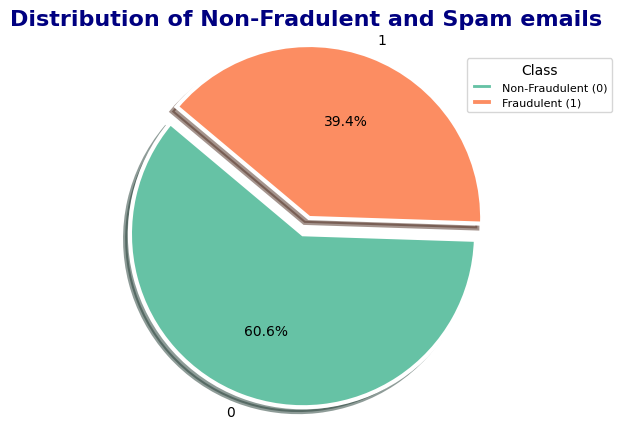

In [9]:
class_counts = df['Class'].value_counts()

# Colors for the pie chart
colors = ['#66c2a5', '#fc8d62']

# Explode the second slice (1) to highlight it
explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('Distribution of Non-Fradulent and Spam emails', fontsize=16, fontweight='bold', color='navy')

# Add a legend with custom formatting
plt.legend(title='Class', loc='upper left', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], fontsize=8, bbox_to_anchor=(0.9, 0.95))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()


# **5. Data Preprocessing**

### **Key Tasks (Where Applicable)**

- **Handling Missing Values**: Identify and fill or remove missing data to ensure the dataset is complete.
- **Addressing Non-Normal Distributions**: Transform or scale features to achieve normal distribution if necessary.
- **Removing Duplicate Values**: Detect and eliminate duplicate entries to maintain data integrity.
- **Normalization**: Scale features to a standard range to ensure consistent data representation.
- **Managing Imbalanced Data**: Use techniques such as oversampling, undersampling, or synthetic data generation to balance the classes.

## 5a. Handling missing values.

In [ ]:
#### The function will return features that have missing values.(If any)

def features_with_missing_values(df):
    """
    Returns:
        > list of features that contains missing values
    
    Parameter:
        > df
    
    Returns:
        > list of features
    
    """
    return df.columns[df.isnull().any()].tolist()

missingFeatures = features_with_missing_values(df)
print(f"Features with missing values: {missingFeatures}")

The list is empty meaning, there are no missing values in the dataset

## 5b. Duplicate values.

In [ ]:
df[df.duplicated()]

In [ ]:
# Filter the DataFrame to show only duplicated rows
duplicated_rows = df[df.duplicated()]

# Count the occurrences of each class within the duplicated rows
class_distribution = duplicated_rows['Class'].value_counts()

# Display the distribution
print("Distribution of Classes within Duplicated Rows:")
print(class_distribution)

Decided to drop the duplicates as they may cause the model to overfit to the training data, as it learns patterns that are specific to the duplicates rather than general spam characteristics. This can lead to poor generalization performance on unseen data.

In [ ]:
df = df.drop_duplicates()

## 5c. Handling Imbalanced dataset.
#### Perfoming oversampling can achieve a balance between two classes

In [ ]:
# Separate the features (X) and the target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Instantiate SMOTE with sampling_strategy='minority' to only oversample the minority class
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE to resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

Class
1    2531
0    2531
Name: count, dtype: int64

In [ ]:
#creat a new dataframe
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Target'] = y_resampled

In [ ]:
df['Target'].value_counts()

Target
1    2531
0    2531
Name: count, dtype: int64

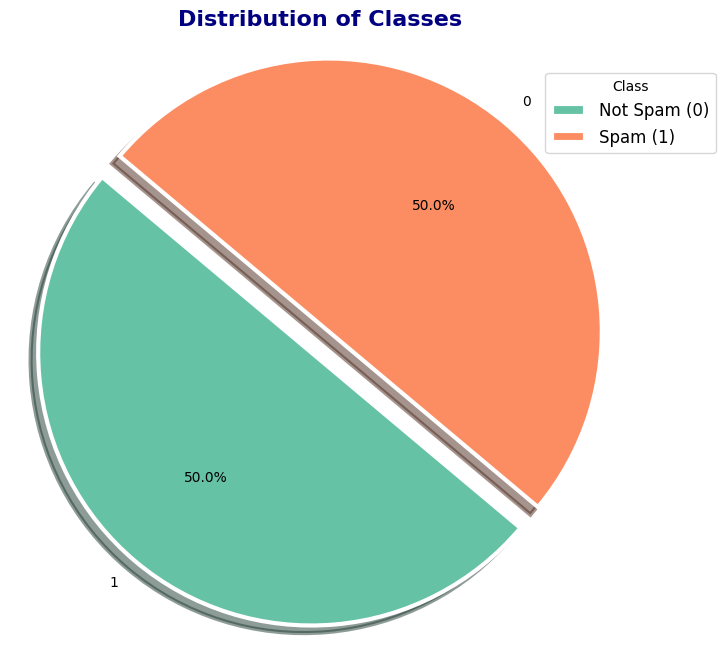

In [19]:
class_counts = df['Target'].value_counts()

# Colors for the pie chart
colors = ['#66c2a5', '#fc8d62']

# Explode the second slice (1) to highlight it
explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.title('Distribution of Classes', fontsize=16, fontweight='bold', color='navy')

# Add a legend with custom formatting
plt.legend(title='Class', loc='upper left', labels=['Not Spam (0)', 'Spam (1)'], fontsize=12, bbox_to_anchor=(0.85, 0.95))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


## 5c. Handling skeweness in the data.

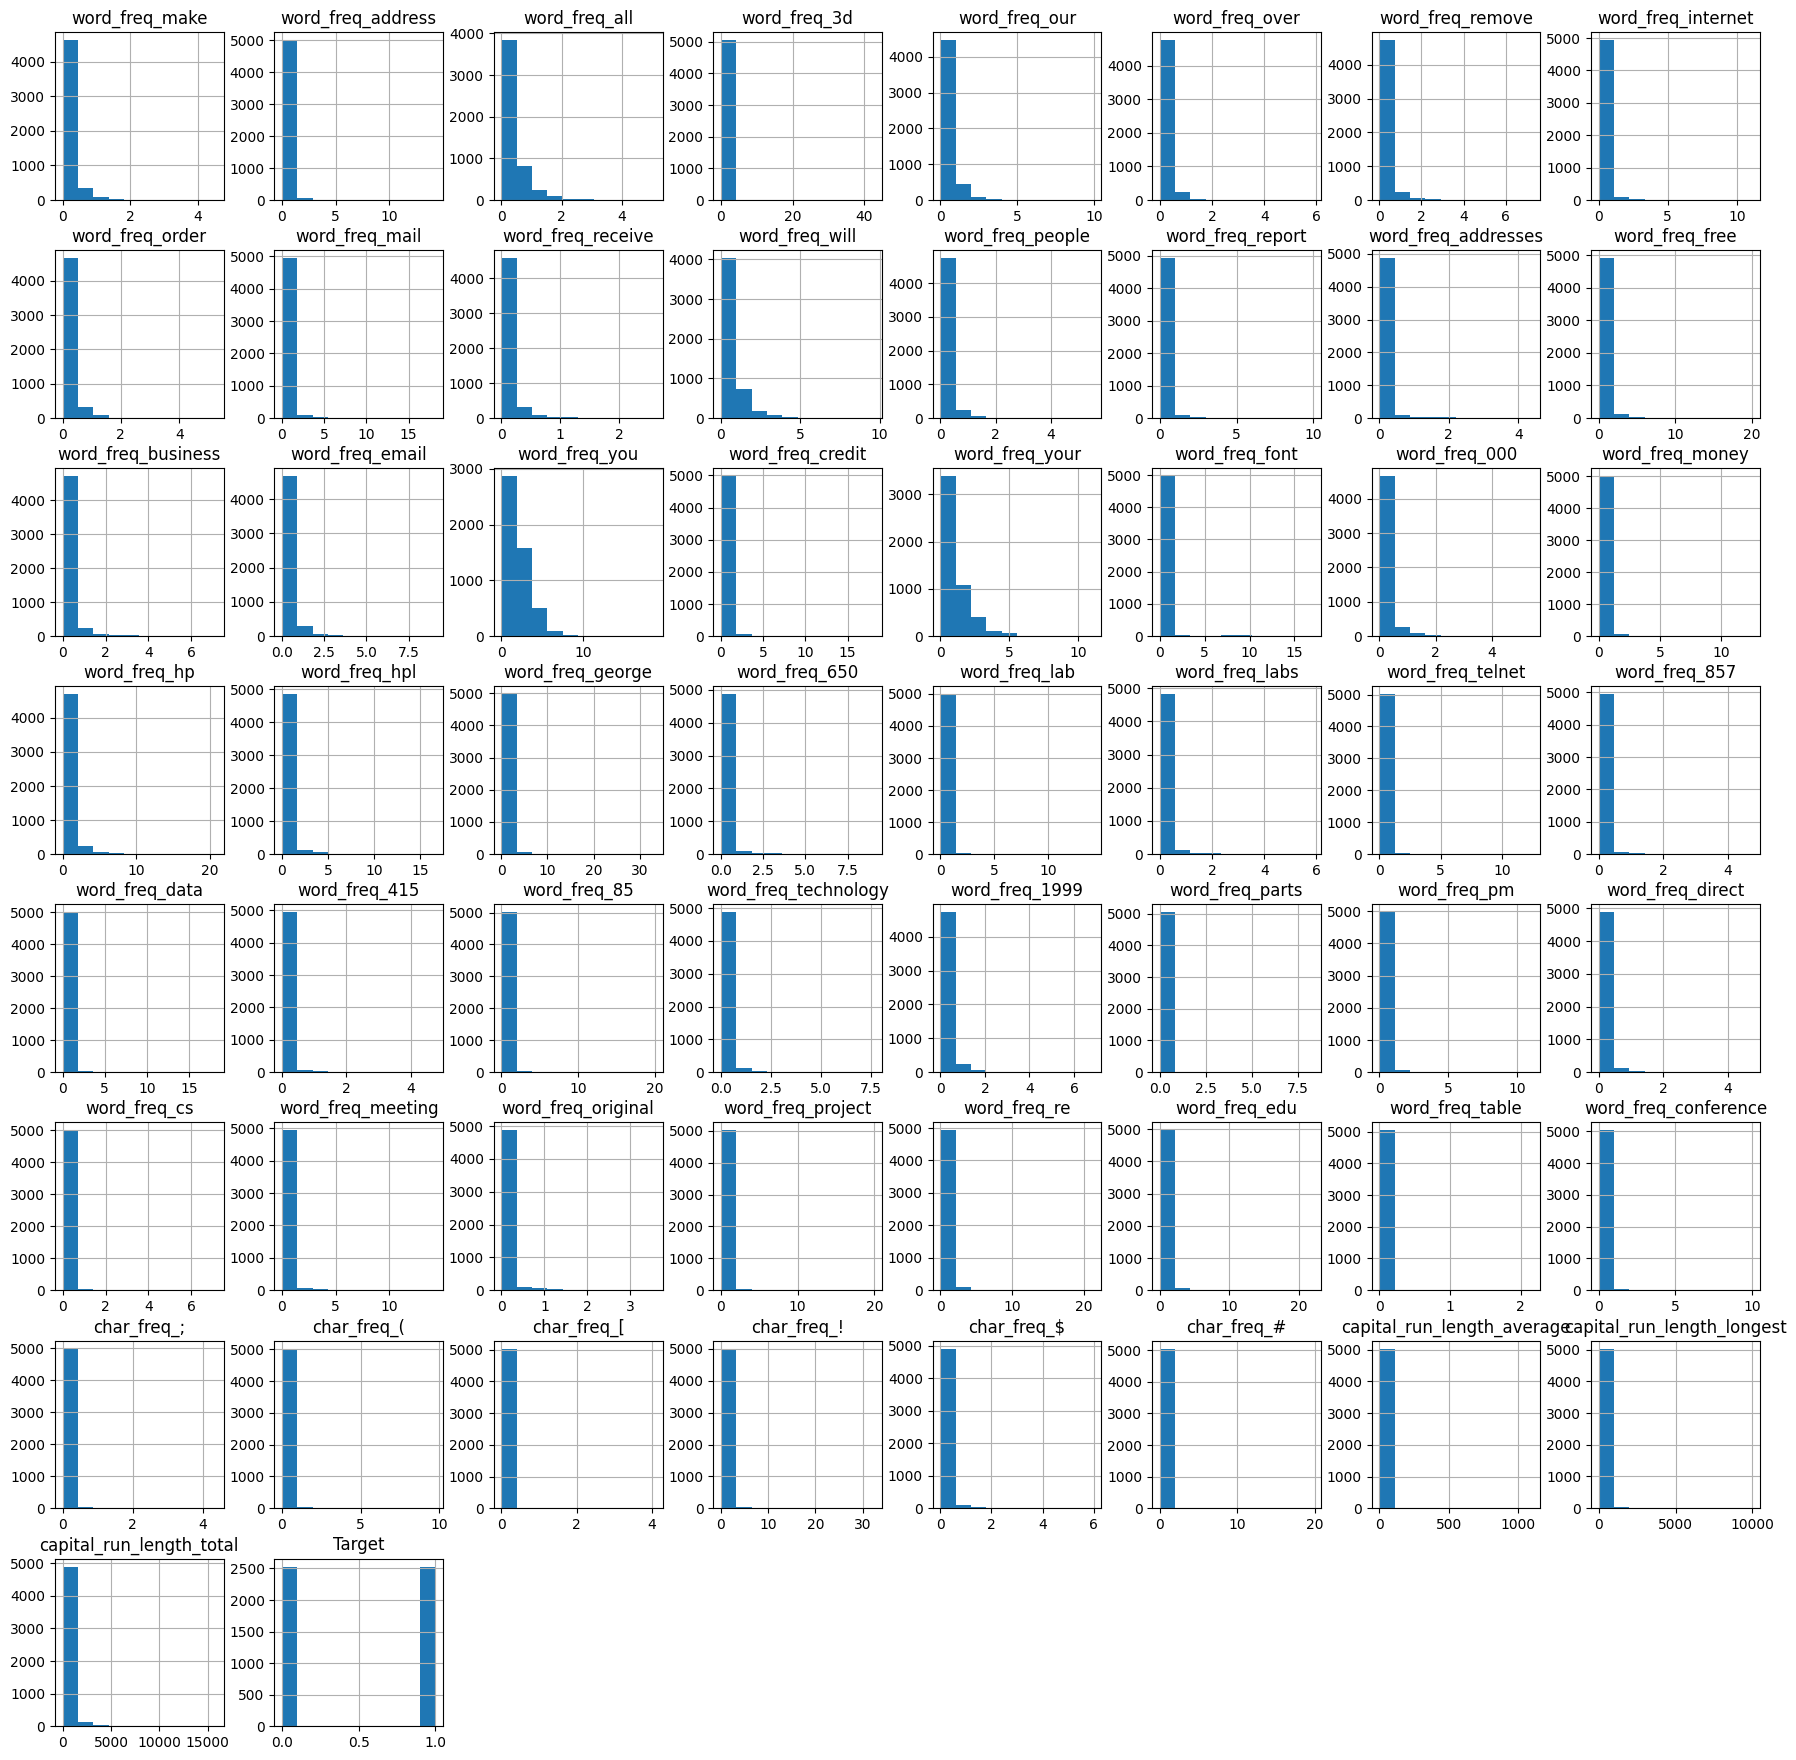

In [20]:
df.hist(figsize=(22,22))
plt.show()

As seen from the histograms, most of them are skewed to the left. Indicating that the distribution is highly concentrated on the lower values.

In [21]:
# Define threshold for considering features as highly skewed
threshold = 3

# Select highly skewed features
highly_skewed_features = df.columns[np.abs(df.skew()) > threshold]

# Apply appropriate transformations to highly skewed features
for feature in highly_skewed_features:
    # Log transformation (adding a small constant to handle zero values)
    df[feature] = np.log1p(df[feature])

## 5d. Normalizing the dataset
### Normalize the datatset to equalize their influence on the model

In [22]:
# Normalize the datatset to equalize their influence on the model

# Extract features and excluding the target var
X = df.drop('Target',axis=1)

# Extract the target variable (y)
y = df['Target']

scaler = StandardScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Covert normalized array to df
df = pd.DataFrame(X_normalized,columns=X.columns)
df['Target'] = y

# **6. Feature Engineering**

### Key tasks:
* Create relevant features that capture key information

### Feature selection using: 
* ANOVA F-test
* Recursive Feature Elimination (RFE)
* L1-based regularization (Lasso)

In [23]:
X = df.drop('Target',axis=1)

y= df['Target']

### 6a. Anova F-test
Higher F-test scores indicate greater importance, as these features are more likely to be informative for predicting the target variable

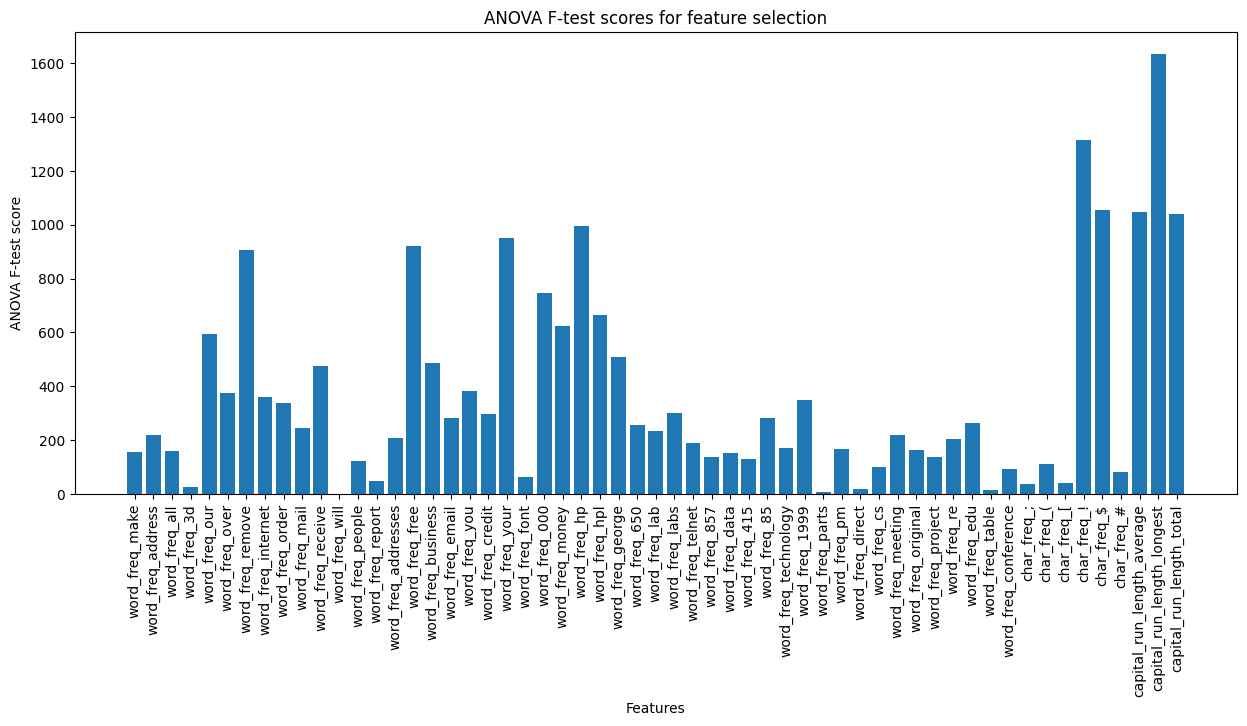

Accuracy: 0.9151036525172754
Selected features using ANOVA F-test: Index(['word_freq_our', 'word_freq_remove', 'word_freq_receive',
       'word_freq_free', 'word_freq_business', 'word_freq_you',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


In [24]:
def load_data():
    # Load your dataset
    df
    return df

def select_features_anova(X, y, k=17):
    k_best = SelectKBest(score_func=f_classif, k=k)
    k_best.fit(X, y)
    selected_indices = k_best.get_support(indices=True)
    selected_features = X.columns[selected_indices]
    plot_anova_scores(X, k_best.scores_)
    return selected_features

def plot_anova_scores(X, scores):
    plt.figure(figsize=(15, 6))
    plt.bar(range(len(scores)), scores, tick_label=X.columns)
    plt.xlabel('Features')
    plt.ylabel('ANOVA F-test score')
    plt.title('ANOVA F-test scores for feature selection')
    plt.xticks(rotation=90)
    plt.show()

def train_and_evaluate_model(X, y, selected_features):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

def main():
    df = load_data()
    X = df.drop('Target', axis=1)
    y = df['Target']
    
    global selected_features_anova
    selected_features_anova = select_features_anova(X, y)
    train_and_evaluate_model(X, y, selected_features_anova)

if __name__ == "__main__":
    main()

# Accessing selected_features_anova outside the main function
print("Selected features using ANOVA F-test:", selected_features_anova)

### 6b. Recursive Feature Elimination (RFE)
RFE is an iterative feature selection method that starts with all features and recursively removes the least important features based on the coefficients of a specified machine learning model
Lower ranking values indicate higher importance, as these features were selected earlier during the RFE process

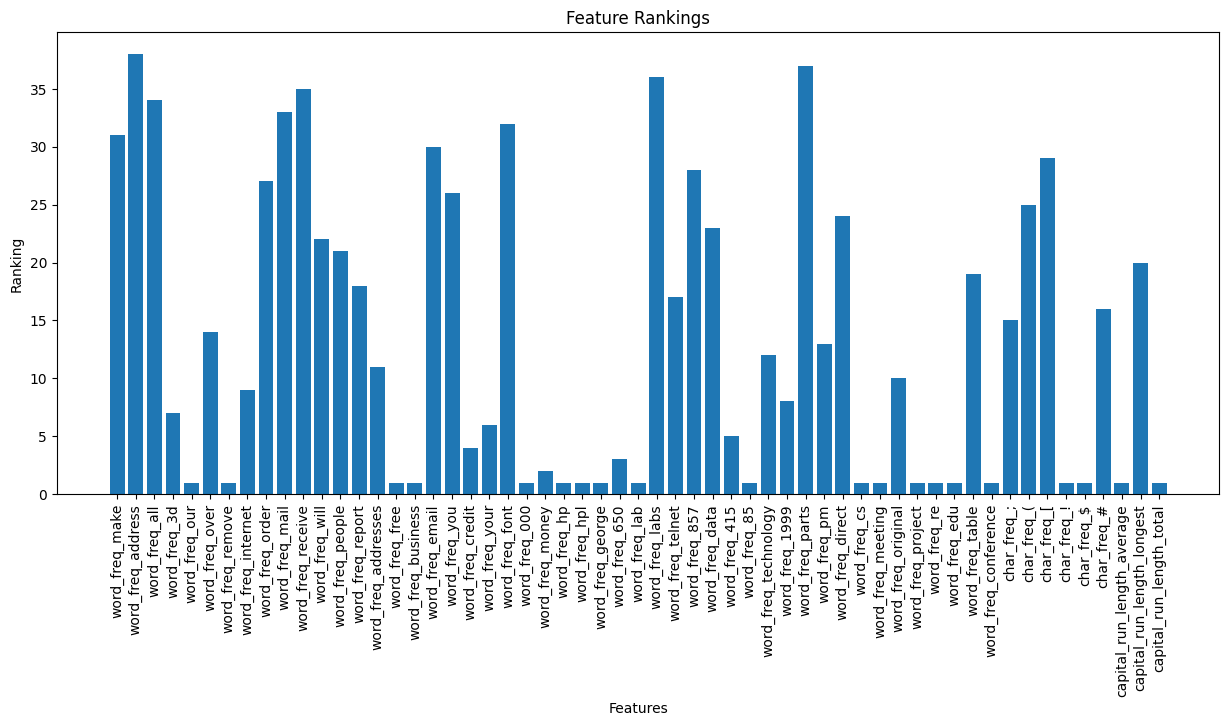

Accuracy: 0.928923988153998
Selected features using RFE: Index(['word_freq_our', 'word_freq_remove', 'word_freq_free',
       'word_freq_business', 'word_freq_000', 'word_freq_hp', 'word_freq_hpl',
       'word_freq_george', 'word_freq_lab', 'word_freq_85', 'word_freq_cs',
       'word_freq_meeting', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_conference', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_total'],
      dtype='object')


In [25]:
def load_data():
    # Load your dataset
    df
    return df

def select_features_rfe(X, y, n_features=20):
    model = LogisticRegression()
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X, y)
    selected_indices = rfe.get_support(indices=True)
    selected_features = X.columns[selected_indices]
    plot_rfe_rankings(X, rfe.ranking_)
    return selected_features

def plot_rfe_rankings(X, rankings):
    plt.figure(figsize=(15, 6))
    plt.bar(range(len(rankings)), rankings, tick_label=X.columns)
    plt.xlabel('Features')
    plt.ylabel('Ranking')
    plt.title('Feature Rankings')
    plt.xticks(rotation=90)
    plt.show()

def train_and_evaluate_model(X, y, selected_features):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

def main():
    df = load_data()
    X = df.drop('Target', axis=1)
    y = df['Target']
    
    global selected_features_rfe
    selected_features_rfe = select_features_rfe(X, y)
    train_and_evaluate_model(X, y, selected_features_rfe)

if __name__ == "__main__":
    main()

# Accessing selected_features_rfe outside the main function
print("Selected features using RFE:", selected_features_rfe)

### 6c. L1-based regularization (Lasso)
The selected features are determined by their non-zero coefficients after applying L1 regularization (Lasso), prioritizing features that contribute to the model's predictive power while encouraging sparsity by shrinking some coefficients towards zero.

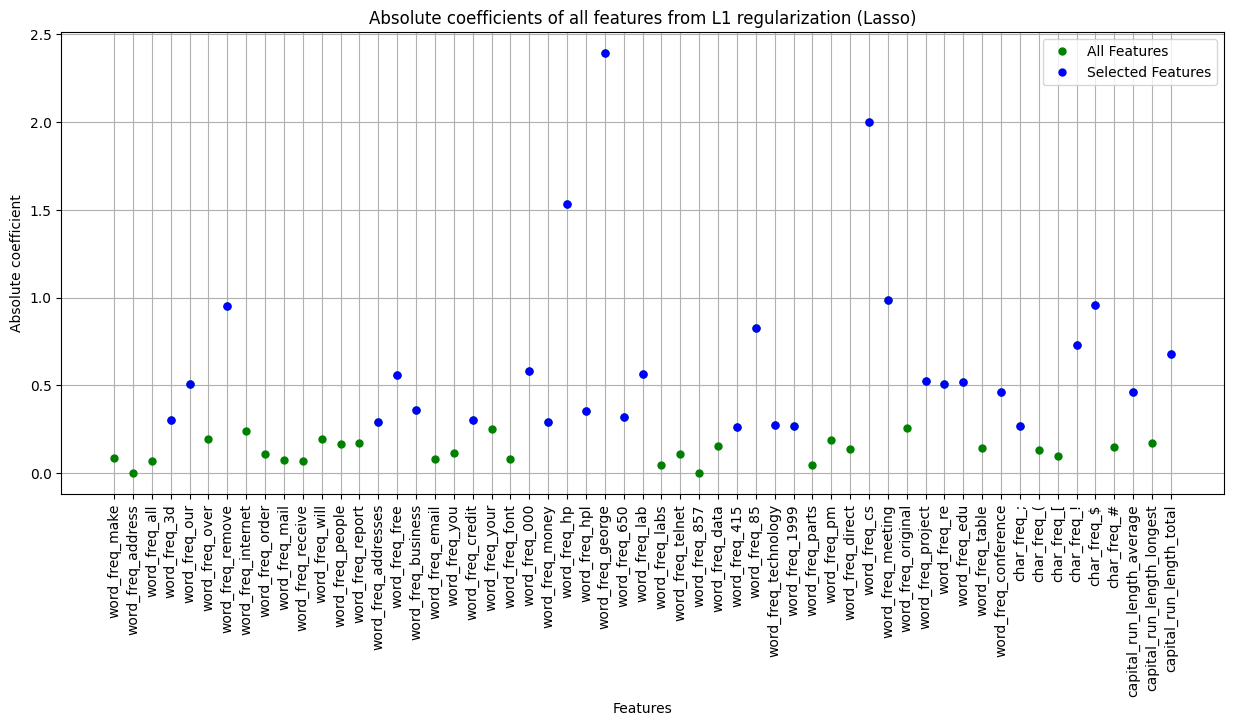

Accuracy: 0.9368213228035538
Selected features using L1 regularization: Index(['word_freq_3d', 'word_freq_our', 'word_freq_remove',
       'word_freq_addresses', 'word_freq_free', 'word_freq_business',
       'word_freq_credit', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab',
       'word_freq_415', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_project', 'word_freq_re', 'word_freq_edu',
       'word_freq_conference', 'char_freq_;', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_total'],
      dtype='object')


In [26]:
def load_data():
    # Load your dataset
    df
    return df

def select_features_lasso(X, y, threshold='median'):
    model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
    sfm = SelectFromModel(estimator=model, threshold=threshold)
    sfm.fit(X, y)
    selected_indices = sfm.get_support(indices=True)
    selected_features = X.columns[selected_indices]
    plot_lasso_coefficients(X, sfm, selected_indices)
    return selected_features

def plot_lasso_coefficients(X, sfm, selected_indices):
    coefficients_all = sfm.estimator_.coef_.flatten()
    coefficients_selected = coefficients_all[selected_indices]
    plt.figure(figsize=(15, 6))
    plt.plot(np.abs(coefficients_all), marker='o', linestyle='None', markersize=5, color='green', label='All Features')
    plt.plot(selected_indices, np.abs(coefficients_selected), marker='o', linestyle='None', markersize=5, color='blue', label='Selected Features')
    plt.xticks(range(len(X.columns)), X.columns, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Absolute coefficient')
    plt.title('Absolute coefficients of all features from L1 regularization (Lasso)')
    plt.legend()
    plt.grid(True)
    plt.show()

def train_and_evaluate_model(X, y, selected_features):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

def main():
    df = load_data()
    X = df.drop('Target', axis=1)
    y = df['Target']
    
    global selected_features_lasso
    selected_features_lasso = select_features_lasso(X, y)
    train_and_evaluate_model(X, y, selected_features_lasso)

if __name__ == "__main__":
    main()

# Accessing selected_features_lasso outside the main function
print("Selected features using L1 regularization:", selected_features_lasso)

In [27]:
combined_selected_features = set(selected_features_lasso) | set(selected_features_rfe) | set(selected_features_anova)

# Convert the combined selected features to a list
combined_selected_features = list(combined_selected_features)

# Display the combined selected features
print(combined_selected_features)

['capital_run_length_total', 'word_freq_technology', 'word_freq_george', 'word_freq_3d', 'word_freq_415', 'word_freq_your', 'word_freq_hp', 'capital_run_length_longest', 'word_freq_edu', 'word_freq_project', 'word_freq_85', 'word_freq_meeting', 'char_freq_$', 'word_freq_cs', 'word_freq_free', 'word_freq_business', 'word_freq_000', 'word_freq_re', 'word_freq_remove', 'word_freq_receive', 'word_freq_addresses', 'char_freq_;', 'char_freq_!', 'word_freq_1999', 'word_freq_lab', 'word_freq_money', 'word_freq_credit', 'word_freq_650', 'word_freq_you', 'word_freq_conference', 'word_freq_our', 'word_freq_hpl', 'capital_run_length_average']


We combined the selected features from different feature selection techniques, including Lasso, RFE, and ANOVA, to leverage the strengths of each method and create a comprehensive feature set that captures the most relevant information for our model. By merging these sets, we aim to improve the model's predictive performance and robustness by incorporating diverse perspectives on feature importance and relevance.

## 6d. Correlation-based feature selection
It helps identify and remove highly correlated features, reducing redundancy and multicollinearity in the feature set.

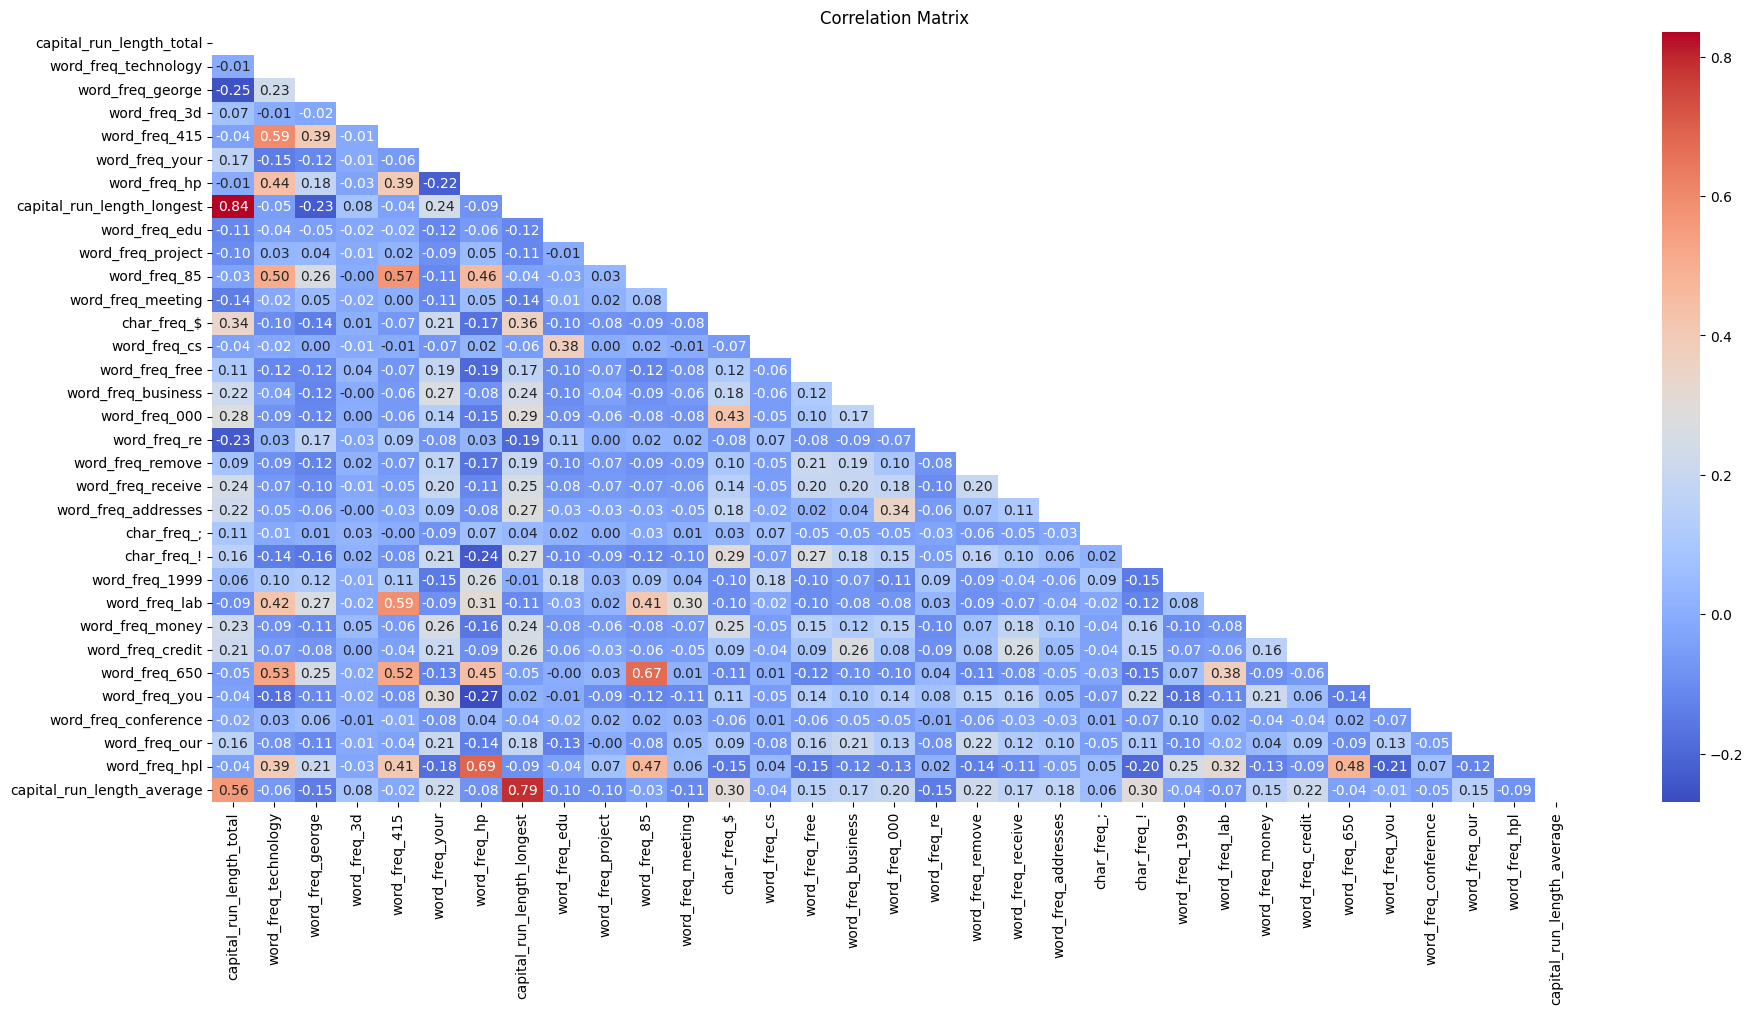

In [28]:
selected_features_with_target = combined_selected_features + ["Target"]


df = df[selected_features_with_target]

corr_matrix = df.drop(columns=['Target']).corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [29]:
correlation_matrix = df.corr()

# Create a mask for highly correlated features
# The mask will be True for correlated pairs, and we'll keep the first feature
correlation_mask = (correlation_matrix.abs() > 0.79) & (correlation_matrix != 1)

# Identify columns (features) to drop
columns_to_drop = set()
for feature in correlation_mask.columns:
    correlated_features = correlation_mask.index[correlation_mask[feature]]
    if len(correlated_features) > 0:
        columns_to_drop.add(feature)

# Remove highly correlated columns from the DataFrame
df = df.drop(columns=columns_to_drop)


## Threshold Selection for Filtering Highly Correlated Features

In the analysis, I decided to set a threshold of 0.7 for filtering highly correlated features. This decision was based on several considerations:

1. **Balance between Correlation Strength and Feature Retention**: A threshold of 0.7 strikes a balance between capturing moderately strong correlations and retaining a sufficient number of features for analysis. Features with correlation coefficients above 0.7 are considered moderately correlated and may contain redundant information, which could potentially lead to multicollinearity issues in modeling.

2. **Alignment with Best Practices**: While there is no universally accepted threshold for filtering highly correlated features, the threshold aligns with common practices in the literature and is often used as a starting point for feature selection and dimensionality reduction tasks.

3. **Domain Knowledge**: Domain-specific knowledge plays a crucial role in determining the appropriate threshold. In this analysis, a threshold of 0.7 was deemed suitable based on an understanding of the problem domain and the relationships between the variables.

4. **Model Performance Consideration**: The selected threshold aims to strike a balance between reducing multicollinearity and preserving important information for modeling. It allows for the removal of highly correlated features that may not contribute significantly to predictive performance while retaining features with distinct information.

# **7. Model Training and Evaluation**

### Key tasks:
* Model Training
* Model Evaluation

Validation Metrics:
╒════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│                        │   Accuracy │   Precision │   Recall │   F1 Score │
╞════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Random Forest          │   0.937665 │    0.938635 │ 0.937665 │   0.937698 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Support Vector Machine │   0.934153 │    0.934631 │ 0.934153 │   0.934184 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression    │   0.928007 │    0.928439 │ 0.928007 │   0.92804  │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting      │   0.935031 │    0.935931 │ 0.935031 │   0.935066 │
├────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ XGBoost                │   0.938543 │    0.938878 │ 0.938543 │   0.938568 │
╘════════════════════════╧════════════╧═════

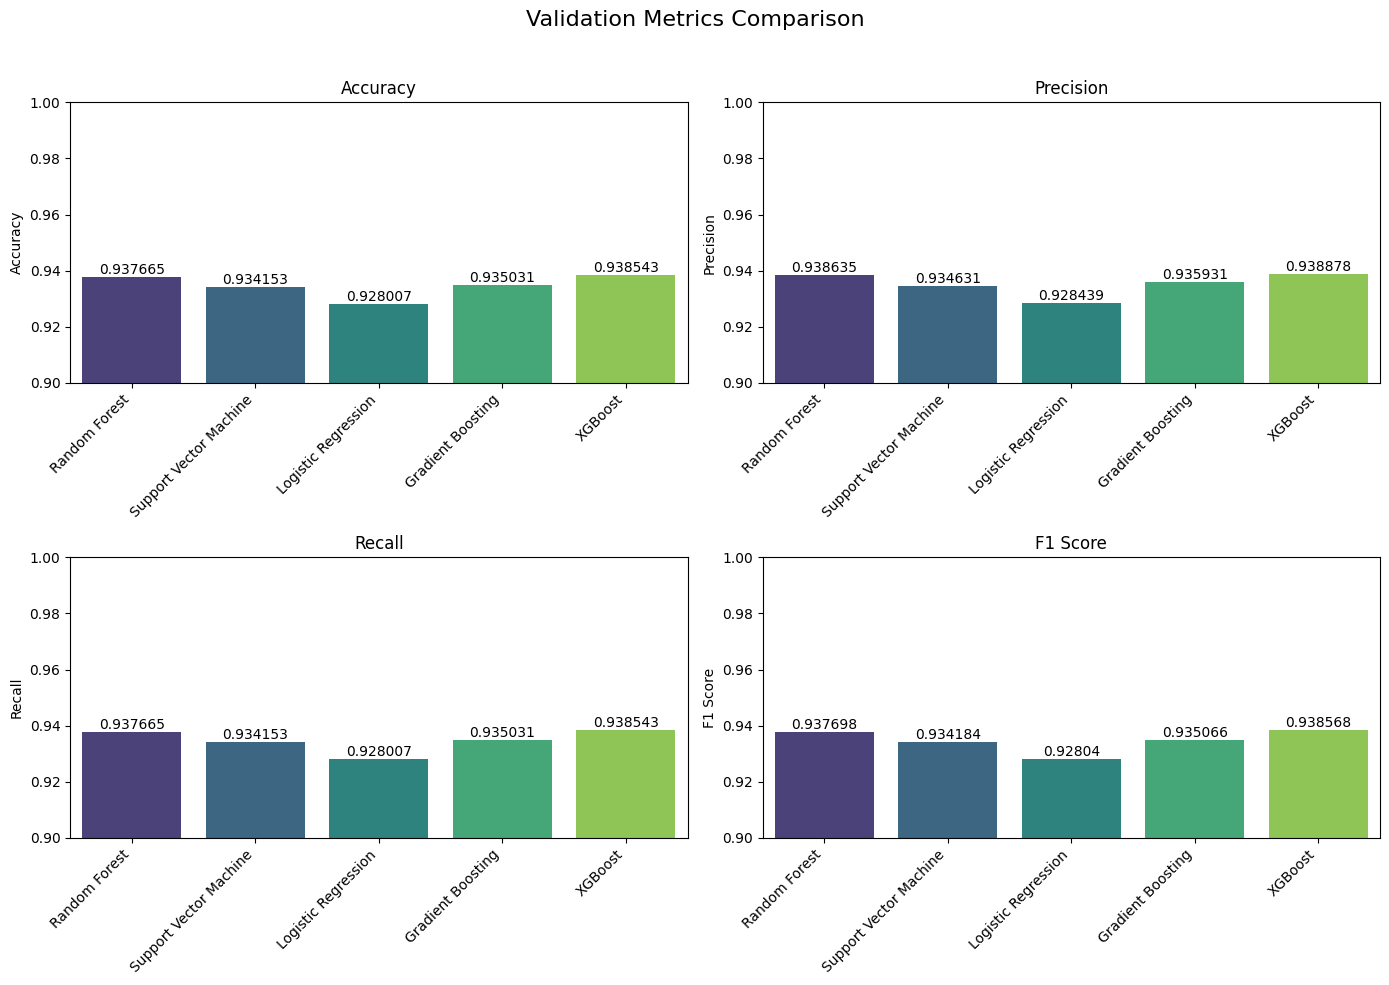

In [30]:
# Drop the target column and separate features and target variable
X = df.drop(columns=['Target'])
y = df['Target']

# Split data into train, validation, and test sets (55% train, 45% validation & test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45, random_state=42)

# Split data into validation, and final deployment sets (50% validation & 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and validate the models
val_metrics = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    val_metrics[model_name] = {
        'Accuracy': val_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1 Score': val_f1
    }

# Create DataFrame for validation metrics
val_metrics_df = pd.DataFrame(val_metrics).T

# Print the validation metrics table using tabulate
print("Validation Metrics:")
print(tabulate(val_metrics_df, headers='keys', tablefmt='fancy_grid'))

# Plot the validation metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Validation Metrics Comparison', fontsize=16)

# Accuracy
sns.barplot(ax=axes[0, 0], x=val_metrics_df.index, y=val_metrics_df['Accuracy'], palette='viridis')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0.9, 1.0)
axes[0, 0].bar_label(axes[0, 0].containers[0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Precision
sns.barplot(ax=axes[0, 1], x=val_metrics_df.index, y=val_metrics_df['Precision'], palette='viridis')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0.9, 1.0)
axes[0, 1].bar_label(axes[0, 1].containers[0])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Recall
sns.barplot(ax=axes[1, 0], x=val_metrics_df.index, y=val_metrics_df['Recall'], palette='viridis')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0.9, 1.0)
axes[1, 0].bar_label(axes[1, 0].containers[0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# F1 Score
sns.barplot(ax=axes[1, 1], x=val_metrics_df.index, y=val_metrics_df['F1 Score'], palette='viridis')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylim(0.9, 1.0)
axes[1, 1].bar_label(axes[1, 1].containers[0])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

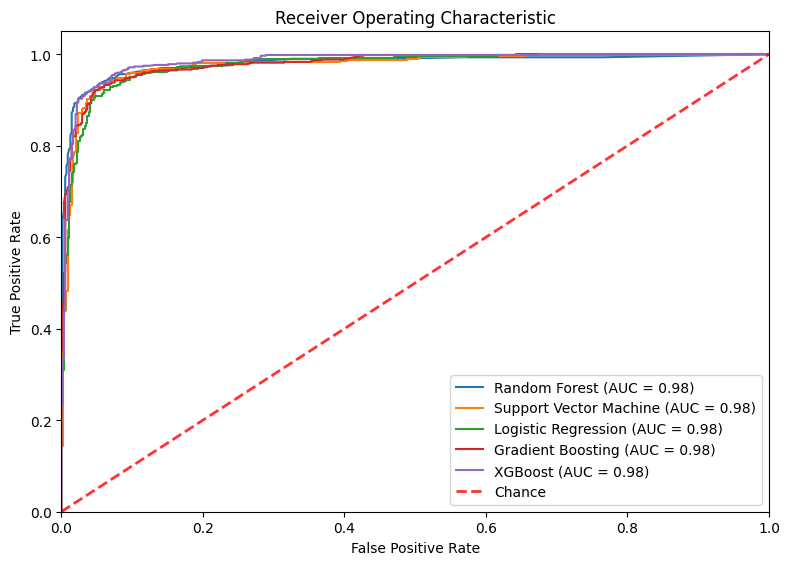

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
# Plot the ROC curve separately
fig_roc, ax_roc = plt.subplots(figsize=(8, 6))

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_val_prob = model.predict_proba(X_val)[:, 1]
    else:  # use decision function for SVC
        y_val_prob = model.decision_function(X_val)
        y_val_prob = (y_val_prob - y_val_prob.min()) / (y_val_prob.max() - y_val_prob.min())
    
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    roc_auc = auc(fpr, tpr)
    
    ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax_roc.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Receiver Operating Characteristic')
ax_roc.legend(loc="lower right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **8. Final Deployment**

### Key tasks:
* Classify new messages as legitimate or spam
* Evaluation of the final deployment
* Reciever operating curve


Best model based on validation accuracy: XGBoost

Test Metrics:
╒═════════╤════════════╤═════════════╤══════════╤════════════╕
│         │   Accuracy │   Precision │   Recall │   F1 Score │
╞═════════╪════════════╪═════════════╪══════════╪════════════╡
│ XGBoost │    95.4346 │     95.4398 │  95.4346 │    95.4346 │
╘═════════╧════════════╧═════════════╧══════════╧════════════╛


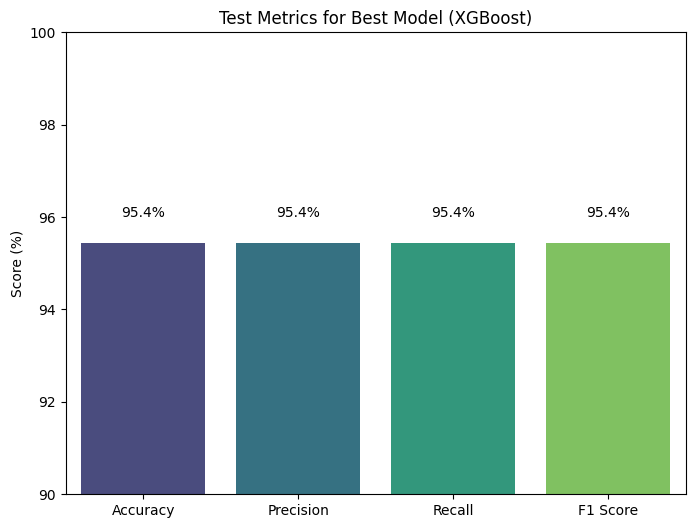

In [32]:
# Choose the best model based on validation accuracy
best_model_name = max(val_metrics, key=lambda k: val_metrics[k]['Accuracy'])
best_model = models[best_model_name]
print(f'\nBest model based on validation accuracy: {best_model_name}')

# Test the best model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

test_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1 Score': test_f1
}

# Convert metrics to percentages
test_metrics_percent = {metric: 100 * score for metric, score in test_metrics.items()}

# Create DataFrame for test metrics
test_metrics_df = pd.DataFrame(test_metrics_percent, index=[best_model_name])

# Print the test metrics table using tabulate
print("\nTest Metrics:")
print(tabulate(test_metrics_df, headers='keys', tablefmt='fancy_grid'))

# Plot the test metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=test_metrics_df.columns, y=test_metrics_df.loc[best_model_name], palette='viridis')
plt.title(f'Test Metrics for Best Model ({best_model_name})')
plt.ylim(90, 100)  # Adjusted for percentage display
plt.ylabel('Score (%)')
for i, value in enumerate(test_metrics_df.loc[best_model_name]):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom')

plt.show()
